In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Wine.csv')
data.shape

(178, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
data.sample(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
95,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937,2
28,13.87,1.90,2.80,19.4,107,2.95,2.97,0.37,1.76,4.50,1.25,3.40,915,1
169,13.40,4.60,2.86,25.0,112,1.98,0.96,0.27,1.11,8.50,0.67,1.92,630,3
40,13.56,1.71,2.31,16.2,117,3.15,3.29,0.34,2.34,6.13,0.95,3.38,795,1
102,12.34,2.45,2.46,21.0,98,2.56,2.11,0.34,1.31,2.80,0.80,3.38,438,2


In [6]:
data['Customer_Segment'].unique()

array([1, 2, 3], dtype=int64)

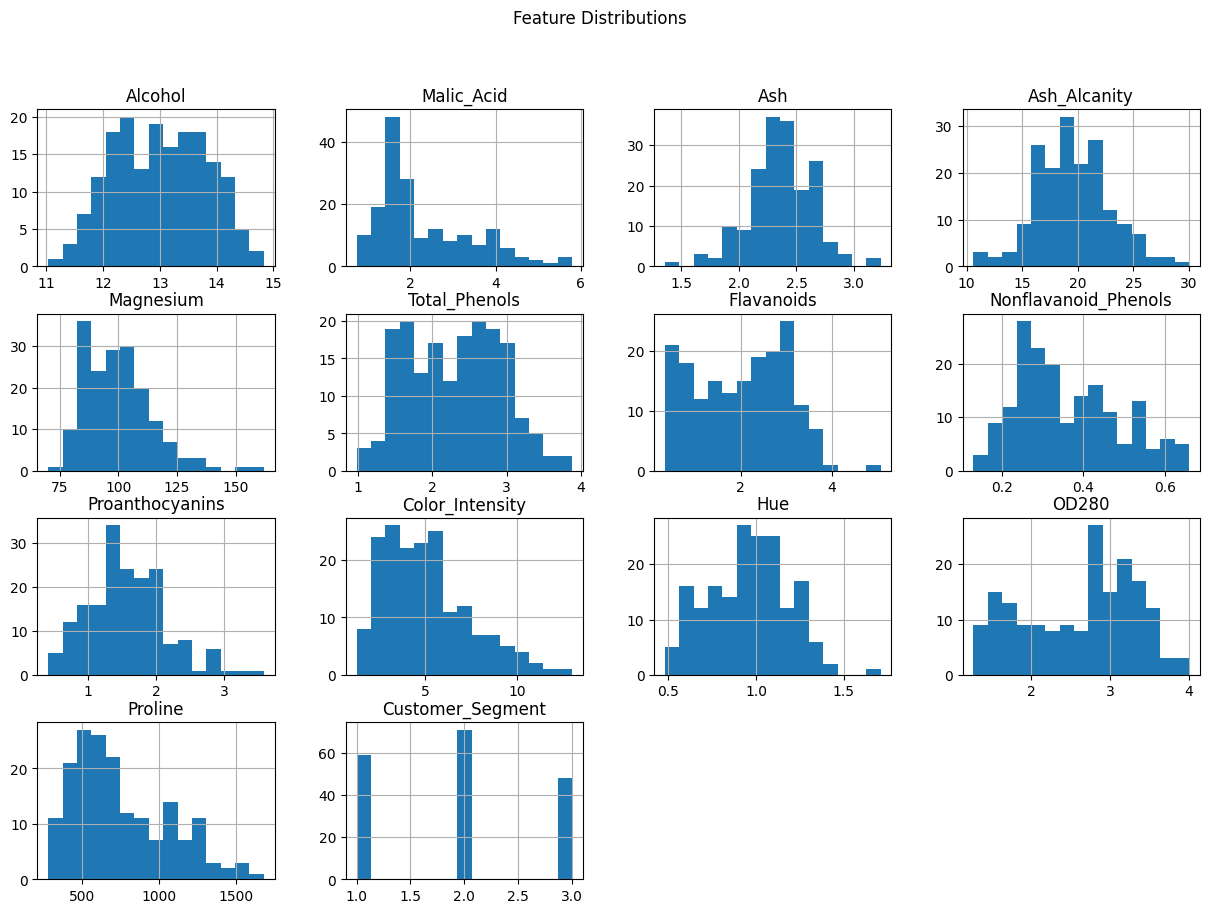

In [7]:
data.hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.suptitle('Feature Distributions')
plt.show()

In [8]:
X = data.iloc[:, :-1]  # Features (all columns except the last)
y = data.iloc[:, -1]   # Target (last column)

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# Apply PCA with the selected number of components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Explained variance by the selected components
explained_variance_ratio_selected = pca.explained_variance_ratio_
print(f"Explained variance by the selected components: {explained_variance_ratio_selected}")

Explained variance by the selected components: [0.36198848 0.1920749 ]


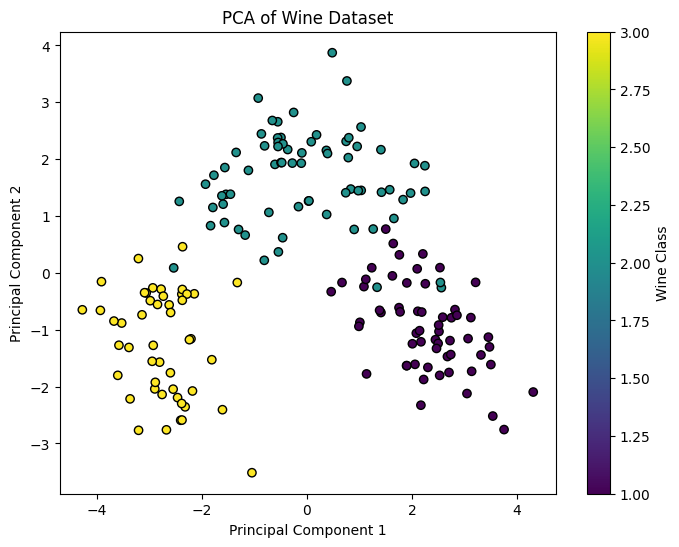

In [11]:
# Visualizing the first two principal components
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Wine Dataset')
plt.colorbar(label='Wine Class')
plt.show()

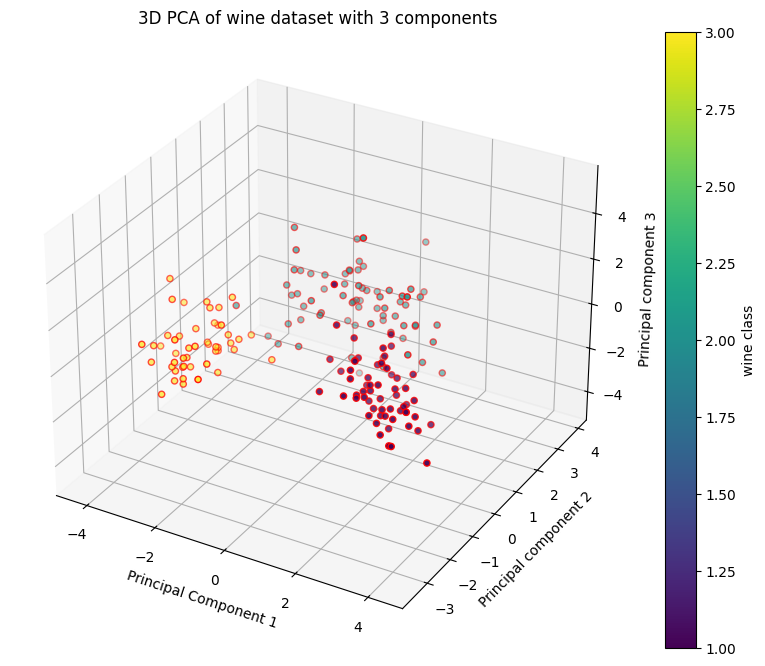

In [13]:
from mpl_toolkits.mplot3d import Axes3D

pca=PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

fig = plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection='3d')
scatter = ax.scatter(X_pca[:,0],X_pca[:,1],X_pca[:,2],c=y,cmap='viridis',edgecolor='red')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal component 2')
ax.set_zlabel('Principal component 3')
plt.title('3D PCA of wine dataset with 3 components')
plt.colorbar(scatter,label='wine class')
plt.show()

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [18]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [19]:
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler':MinMaxScaler(),
    'RobustScaler':RobustScaler(),
    'MaxAbsScaler':MaxAbsScaler(),
}


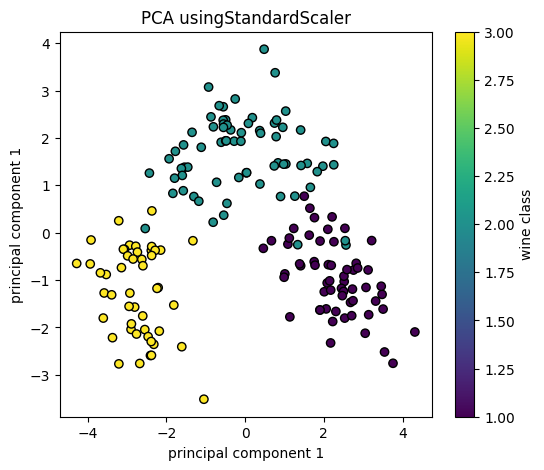

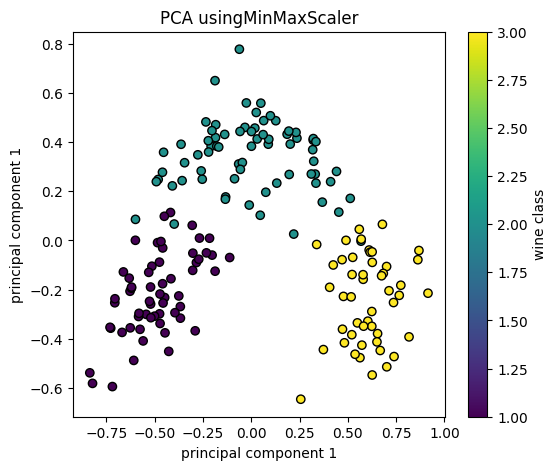

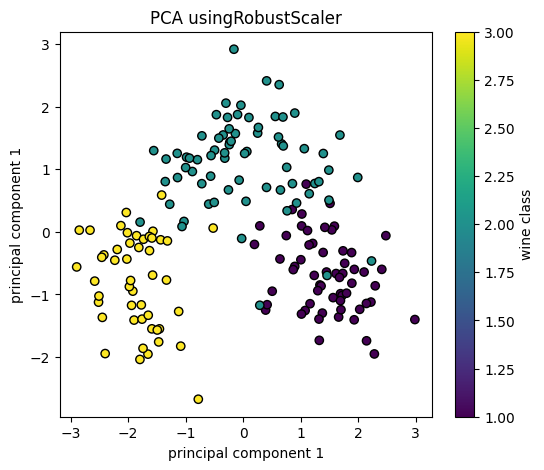

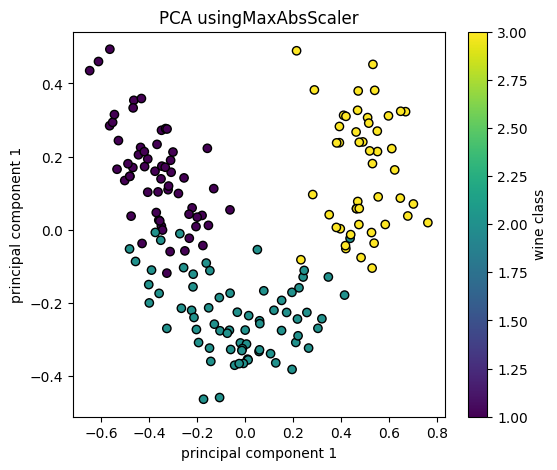

In [20]:
for name,scaler in scalers.items():
    X_scaled = scaler.fit_transform(X)

    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    plt.figure(figsize=(6,5))
    plt.scatter(X_pca[:,0],X_pca[:,1],c=y,cmap='viridis',edgecolor='k')
    plt.title(f"PCA using{name}")
    plt.xlabel('principal component 1')
    plt.ylabel('principal component 1')
    plt.colorbar(label='wine class')
    plt.show()